
1. Importing Libraries  
We start by importing the required libraries for:  
- **Data Handling** → NumPy, Pandas  
- **Visualization** → Matplotlib, Seaborn  
- **Machine Learning** → scikit-learn (Linear Regression, Lasso Regression, train_test_split, evaluation metrics)  
- **Advanced ML** → XGBoost Regressor  


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn import metrics

 2. Loading the Dataset  
The dataset contains information about **used cars** including:  
- Year of manufacture  
- Present Price  
- Kms Driven  
- Fuel Type  
- Seller Type  
- Transmission  
- Owner  

We load the dataset and preview the first few rows to understand its structure.  


In [123]:
car_data=pd.read_csv('/content/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


3. Data Preprocessing  
Steps performed:  
- Handled categorical variables using encoding (Fuel, Seller, Transmission).  
- Checked and handled missing values.  
- Feature scaling applied where necessary.  

This ensures the dataset is clean and ready for model training.  


In [124]:
car_data.shape

(301, 9)

In [125]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [126]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [127]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [128]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())
print(car_data.Car_Name.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64


In [129]:
car_data=car_data.replace({'Fuel_Type': {'Petrol': 0 , 'Diesel':1 , 'CNG':2 }})
car_data=car_data.replace({'Seller_Type': {'Dealer': 0 , 'Individual':1}})
car_data=car_data.replace({'Transmission': {'Manual': 0 , 'Automatic':1  }})

/tmp/ipython-input-1091006048.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data=car_data.replace({'Fuel_Type': {'Petrol': 0 , 'Diesel':1 , 'CNG':2 }})
/tmp/ipython-input-1091006048.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data=car_data.replace({'Seller_Type': {'Dealer': 0 , 'Individual':1}})
/tmp/ipython-input-1091006048.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

In [130]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [131]:
X = car_data.drop(['Selling_Price', 'Car_Name'], axis=1)
y = car_data['Selling_Price']

In [132]:
print(X)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

 4. Exploratory Data Analysis (EDA)  
We analyze the dataset to find key insights:  
- Distribution of Selling Prices  
- Relationship between Year and Selling Price  
- Impact of Fuel Type and Transmission on prices  
- Correlation between numerical features  

Visualization helps us understand patterns and relationships in the data.  


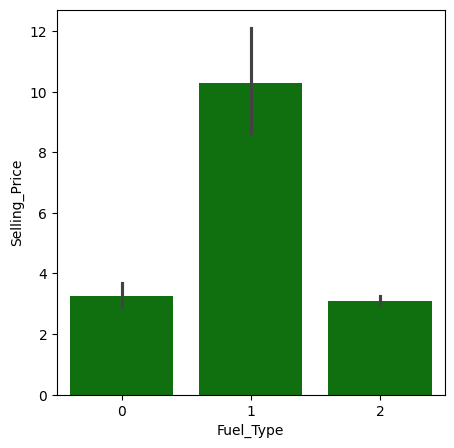

In [158]:
plt.figure(figsize=(5,5))
sns.barplot(x='Fuel_Type', y ='Selling_Price' , data=car_data , color ='green')
plt.show()

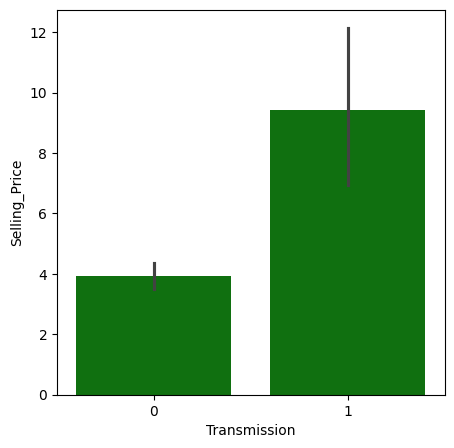

In [159]:
plt.figure(figsize=(5,5))
sns.barplot(x='Transmission', y ='Selling_Price' , data=car_data , color ='green')
plt.show()

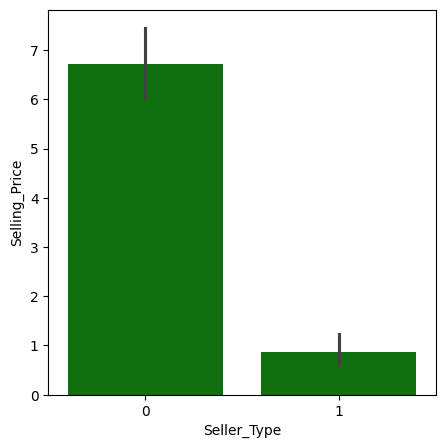

In [162]:
plt.figure(figsize=(5,5))
sns.barplot(x='Seller_Type', y ='Selling_Price' , data=car_data , color ='green')
plt.show()

<Axes: >

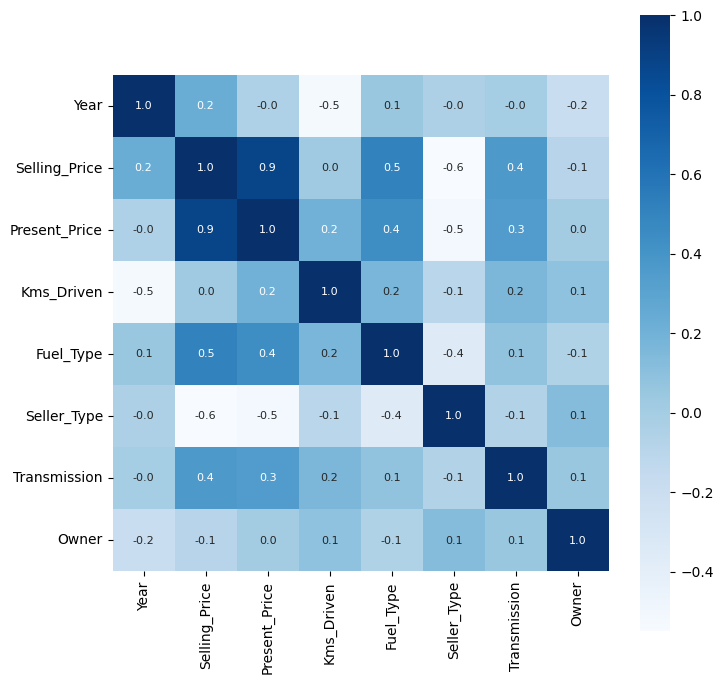

In [156]:
corr=car_data.drop('Car_Name', axis=1).corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr , cbar=True , square=True , fmt='.1f', annot=True ,annot_kws=({'size':8}), cmap='Blues')

In [134]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.1, random_state=42)

In [135]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


5. Model Building  
We apply three regression models to predict car selling prices:  

1. **Linear Regression** → Baseline model for linear relationships.  
2. **Lasso Regression** → Regularized model for feature selection and reducing overfitting.  
3. **XGBoost Regression** → Gradient boosting model to capture non-linear relationships.  


In [136]:
lin_reg_model=LinearRegression()

In [137]:
lin_reg_model.fit(X_train , y_train)

LinearRegression()

6. Model Evaluation  
We evaluate the models using **R² Score** on both training and testing data.  

| Model              | Training R² | Testing R² |  
|--------------------|-------------|------------|  
| Linear Regression  | ~88%       | ~83%       |  
| Lasso Regression   | ~84%        | ~83%       |  
| XGBoost Regression | ~99%       | ~96%       |  

 **Observation:** XGBoost outperforms other models with the highest testing accuracy.  


In [138]:
traning_data_prediction=lin_reg_model.predict(X_train)
error_score=metrics.r2_score(y_train,traning_data_prediction)
print("The R2_error is :",error_score)

The R2_error is : 0.8806173715719129


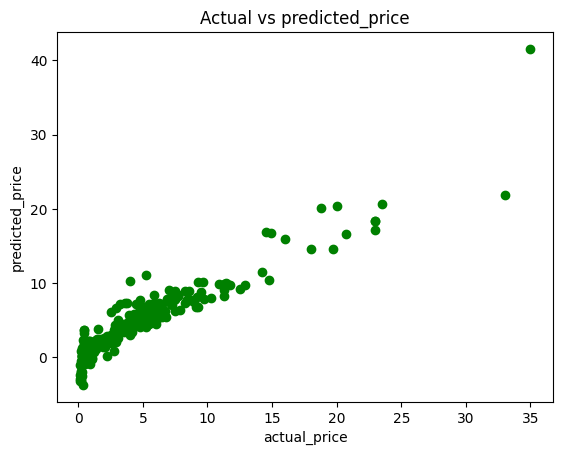

In [139]:
plt.scatter(y_train , traning_data_prediction , color='green')
plt.xlabel("actual_price")
plt.ylabel("predicted_price")
plt.title("Actual vs predicted_price")
plt.show()

In [140]:
testing_data_prediction=lin_reg_model.predict(X_test)
error_score=metrics.r2_score(y_test,testing_data_prediction)
print("The R2_error is :",error_score)

The R2_error is : 0.8311069476244144


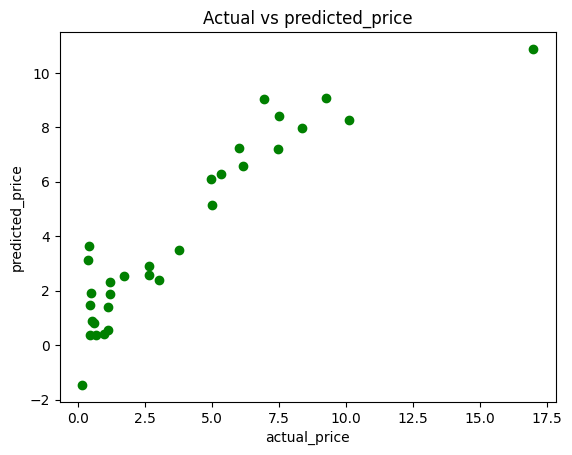

In [141]:
plt.scatter(y_test , testing_data_prediction , color='green')
plt.xlabel("actual_price")
plt.ylabel("predicted_price")
plt.title("Actual vs predicted_price")
plt.show()

In [142]:
lasso_reg_model=Lasso()

In [143]:
lasso_reg_model.fit(X_train , y_train)

Lasso()

In [144]:
traning_data_prediction=lasso_reg_model.predict(X_train)
error_score=metrics.r2_score(y_train,traning_data_prediction)
print("The R2_error is :",error_score)

The R2_error is : 0.8436909482009372


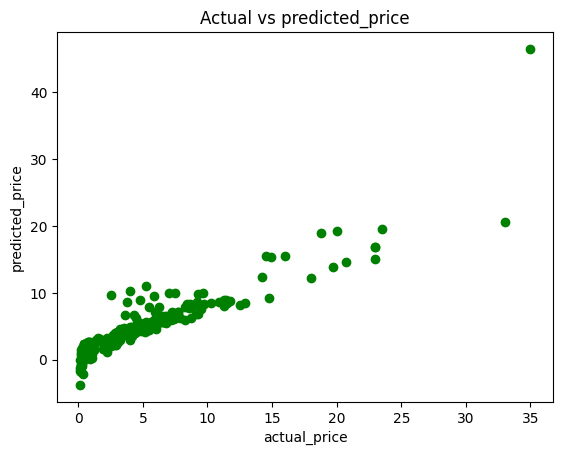

In [145]:
plt.scatter(y_train , traning_data_prediction , color='green')
plt.xlabel("actual_price")
plt.ylabel("predicted_price")
plt.title("Actual vs predicted_price")
plt.show()

In [146]:
testing_data_prediction=lasso_reg_model.predict(X_test)
error_score=metrics.r2_score(y_test,testing_data_prediction)
print("The R2_error is :",error_score)

The R2_error is : 0.839226320049874


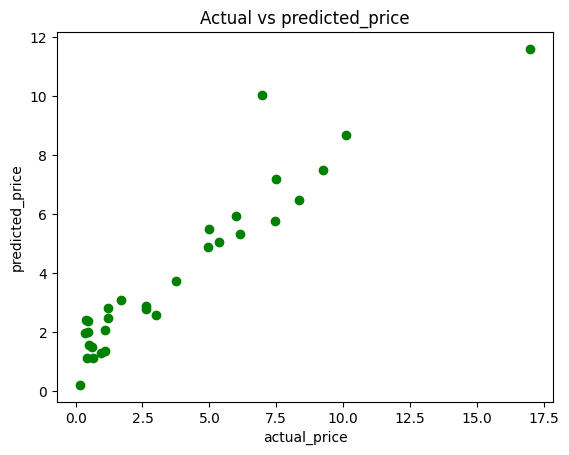

In [147]:
plt.scatter(y_test , testing_data_prediction , color='green')
plt.xlabel("actual_price")
plt.ylabel("predicted_price")
plt.title("Actual vs predicted_price")
plt.show()

In [148]:
model=XGBRegressor()

In [149]:
model.fit(X_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [150]:
traning_data_prediction=model.predict(X_train)
error_score=metrics.r2_score(y_train,traning_data_prediction)
print("The R2_error is :",error_score)

The R2_error is : 0.9999872670894698


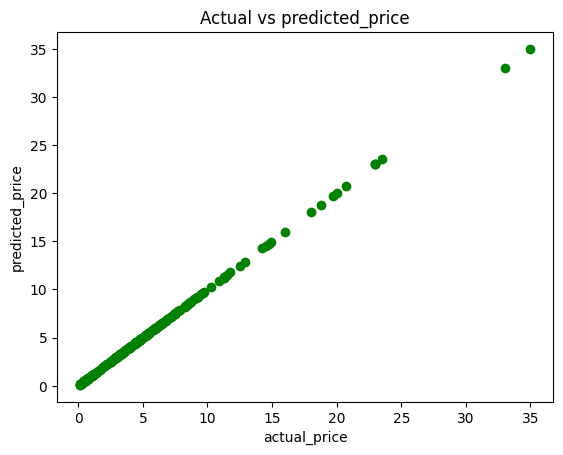

In [151]:
plt.scatter(y_train , traning_data_prediction , color='green')
plt.xlabel("actual_price")
plt.ylabel("predicted_price")
plt.title("Actual vs predicted_price")
plt.show()

In [152]:
testing_data_prediction=model.predict(X_test)
error_score=metrics.r2_score(y_test,testing_data_prediction)
print("The R2_error is :",error_score)

The R2_error is : 0.9649854903327261


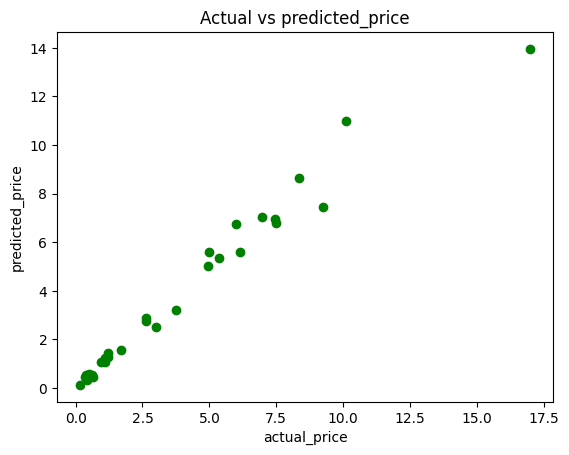

In [153]:
plt.scatter(y_test , testing_data_prediction , color='green')
plt.xlabel("actual_price")
plt.ylabel("predicted_price")
plt.title("Actual vs predicted_price")
plt.show()

7. Conclusion  
- **XGBoost Regression** performed the best with highest testing accuracy.  
- Linear and Lasso models provided decent results but were slightly less accurate.  
- Since dataset size is small (~301 rows), results may vary with more data.  

 Future improvements:  
- Collect larger datasets  
- Apply hyperparameter tuning for XGBoost  
- Use cross-validation for more robust evaluation  
